<a href="https://colab.research.google.com/github/UNT-CSCE-Projects/US_stock_market_prediction/blob/ml-avijeet/Optiver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'white', palette = 'viridis')
pal = sns.color_palette('viridis')

In [87]:
train= pd.read_csv("train_142.csv")

In [88]:
train = train.drop(columns=[ "Unnamed: 0","row_id"])

In [89]:
train['far_price'] = train['far_price'].fillna(train['far_price'].mean())
train['near_price'] = train['near_price'].fillna(train['near_price'].mean())

In [96]:
train['imbalance_buy_flag'] = (train['imbalance_buy_sell_flag'] == 1).astype(int)
train['imbalance_sell_flag'] = (train['imbalance_buy_sell_flag'] == -1).astype(int)
train['no_imbalance'] = (train['imbalance_buy_sell_flag'] == 0).astype(int)


In [94]:
desc = pd.DataFrame(index = list(train))
desc['count'] = train.count()
desc['nunique'] = train.nunique()
desc['%unique'] = desc['nunique'] / len(train) * 100
desc['null'] = train.isnull().sum()
desc['type'] = train.dtypes
desc = pd.concat([desc, train.describe().T], axis = 1)
desc

count  nunique     %unique  null     type    count  \
stock_id                 26455        1    0.003780     0    int64  26455.0   
date_id                  26455      481    1.818182     0    int64  26455.0   
seconds_in_bucket        26455       55    0.207900     0    int64  26455.0   
imbalance_size           26455    22249   84.101304     0  float64  26455.0   
imbalance_buy_sell_flag  26455        3    0.011340     0    int64  26455.0   
reference_price          26455     8115   30.674731     0  float64  26455.0   
matched_size             26455    20462   77.346437     0  float64  26455.0   
far_price                26455     4548   17.191457     0  float64  26455.0   
near_price               26455     6125   23.152523     0  float64  26455.0   
bid_price                26455     7991   30.206010     0  float64  26455.0   
bid_size                 26455    25553   96.590437     0  float64  26455.0   
ask_price                26455     7961   30.092610     0  float64  26455.0   
ask_size                 26455    25665   97.013797     0  float64  26455.0   
wap                      26455     8481   32.058212     0  float64  26455.0   
target                   26455     3594   13.585334     0  float64  26455.0   
time_id                  26455    26455  100.000000     0    int64  26455.0   
imbalance_buy_flag       26455        2    0.007560     0    int64  26455.0   
imbalance_sell_flag      26455        2    0.007560     0    int64  26455.0   
no_imbalance             26455        2    0.007560     0    int64  26455.0   

                                 mean           std           min  \
stock_id                 1.420000e+02  0.000000e+00  1.420000e+02   
date_id                  2.400000e+02  1.388551e+02  0.000000e+00   
seconds_in_bucket        2.700000e+02  1.587481e+02  0.000000e+00   
imbalance_size           2.159371e+07  3.357177e+07  0.000000e+00   
imbalance_buy_sell_flag -1.980722e-02  9.496196e-01 -1.000000e+00   
reference_price          1.000007e+00  2.511807e-03  9.527130e-01   
matched_size             1.678931e+08  1.600705e+08  2.083488e+07   
far_price                1.000247e+00  8.190292e-03  9.452710e-01   
near_price               1.000050e+00  6.314961e-03  9.485230e-01   
bid_price                9.998143e-01  2.519713e-03  9.527470e-01   
bid_size                 4.994326e+04  8.402079e+04  4.280800e+02   
ask_price                1.000218e+00  2.488469e-03  9.533230e-01   
ask_size                 5.352319e+04  1.269350e+05  4.277300e+02   
wap                      1.000012e+00  2.511102e-03  9.527520e-01   
target                   8.477443e-03  9.123329e+00 -3.852898e+02   
time_id                  1.322700e+04  7.637045e+03  0.000000e+00   
imbalance_buy_flag       4.411642e-01  4.965357e-01  0.000000e+00   
imbalance_sell_flag      4.609715e-01  4.984839e-01  0.000000e+00   
no_imbalance             9.786430e-02  2.971367e-01  0.000000e+00   

                                  25%           50%           75%  \
stock_id                 1.420000e+02  1.420000e+02  1.420000e+02   
date_id                  1.200000e+02  2.400000e+02  3.600000e+02   
seconds_in_bucket        1.300000e+02  2.700000e+02  4.100000e+02   
imbalance_size           3.754001e+06  1.206009e+07  2.716184e+07   
imbalance_buy_sell_flag -1.000000e+00  0.000000e+00  1.000000e+00   
reference_price          9.988865e-01  1.000021e+00  1.001192e+00   
matched_size             8.936611e+07  1.375257e+08  2.002404e+08   
far_price                1.000247e+00  1.000247e+00  1.000247e+00   
near_price               1.000050e+00  1.000050e+00  1.000050e+00   
bid_price                9.987160e-01  9.998350e-01  1.000993e+00   
bid_size                 5.328180e+03  1.878948e+04  6.069225e+04   
ask_price                9.991075e-01  1.000249e+00  1.001390e+00   
ask_size                 5.717375e+03  2.052002e+04  6.415930e+04   
wap                      9.989065e-01  1.000000e+00  1.001192e+00   
target                  -3.5

In [35]:
temporal_features = ['date_id', 'seconds_in_bucket']
categorical_features = ['imbalance_buy_sell_flag', 'stock_id']
numerical_features = train.drop(temporal_features + categorical_features, axis = 1).columns

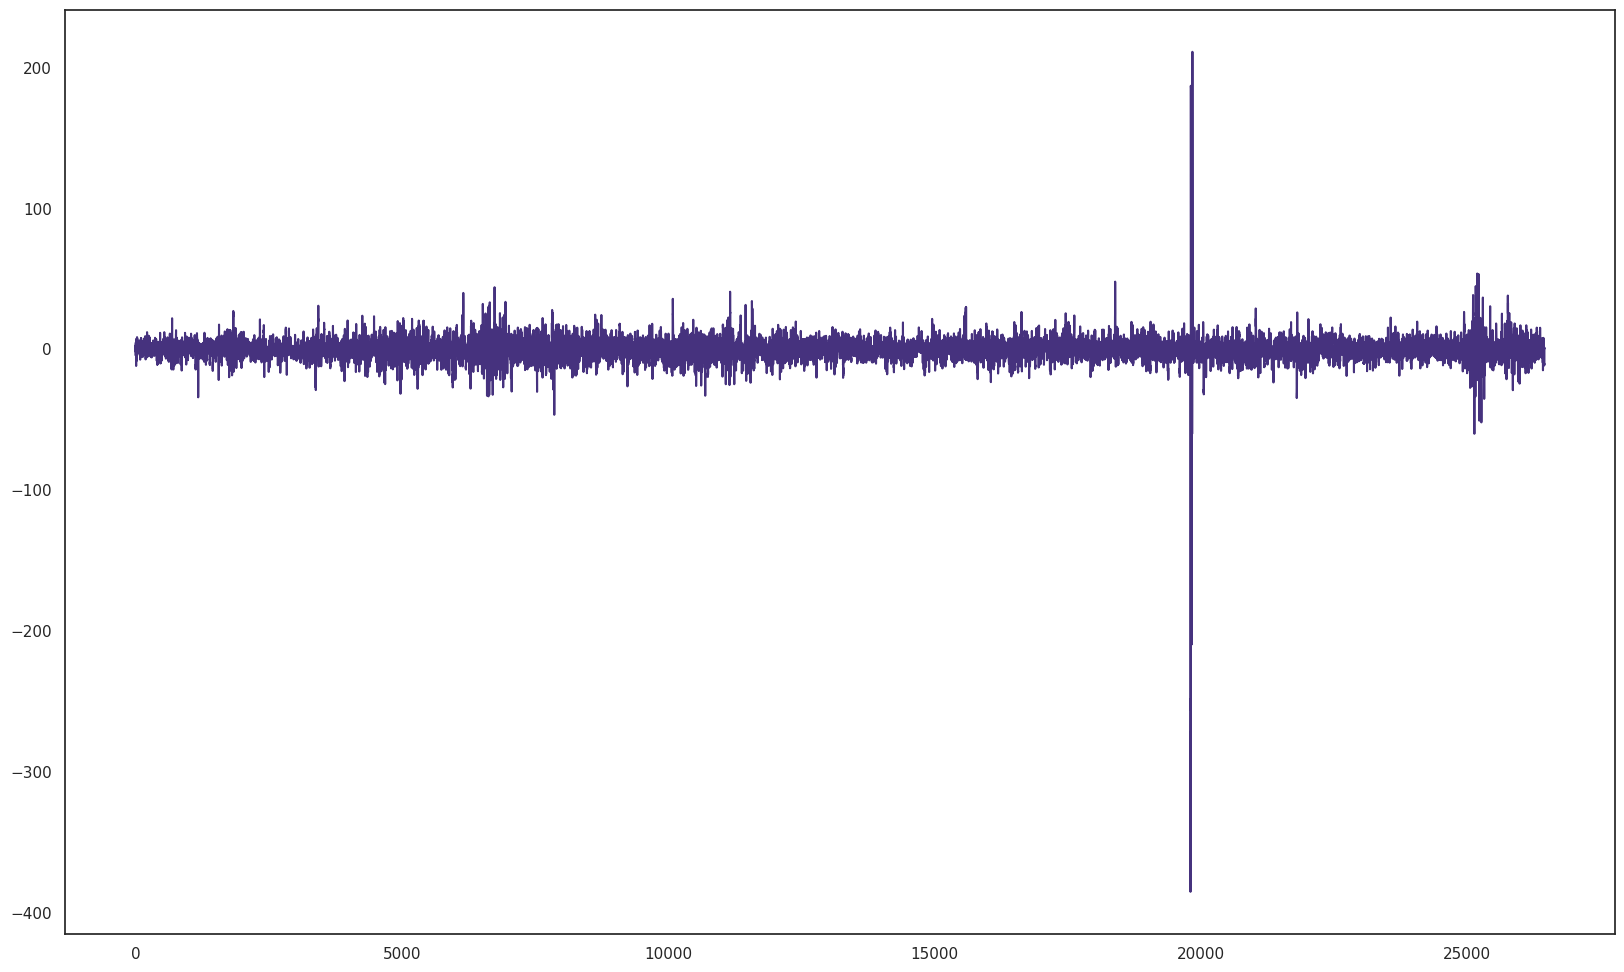

In [49]:
plt.figure(figsize=(20,12))
plt.plot(train['time_id'], train['target'])

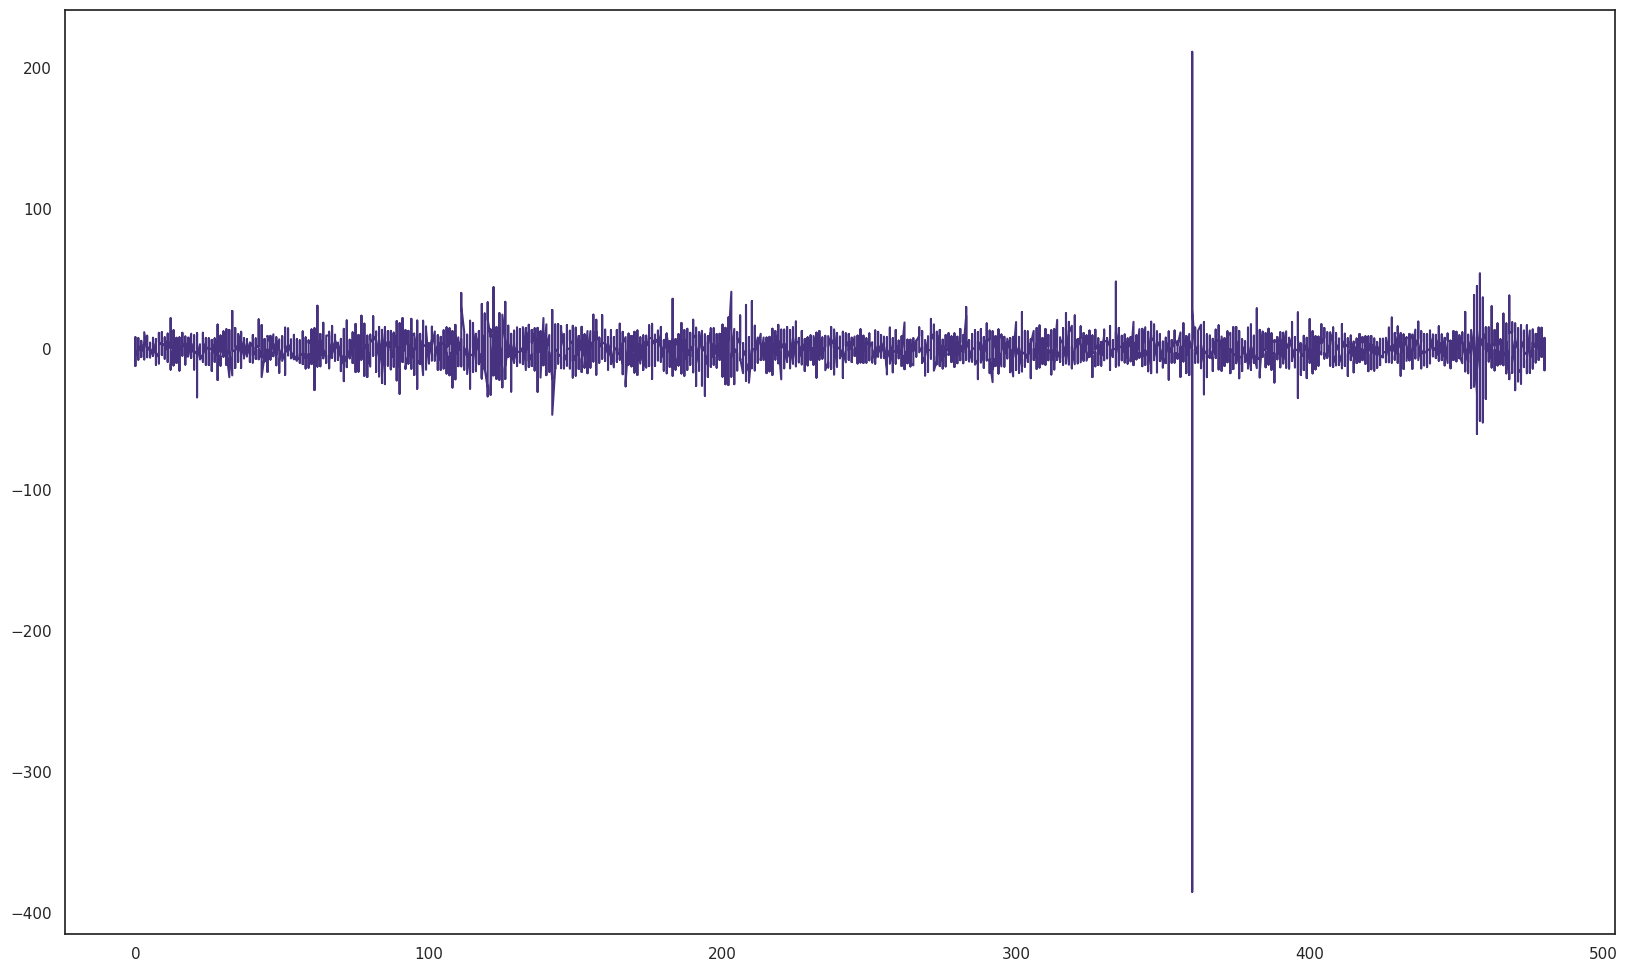

In [48]:
plt.figure(figsize=(20,12))
plt.plot(train['date_id'], train['target'])

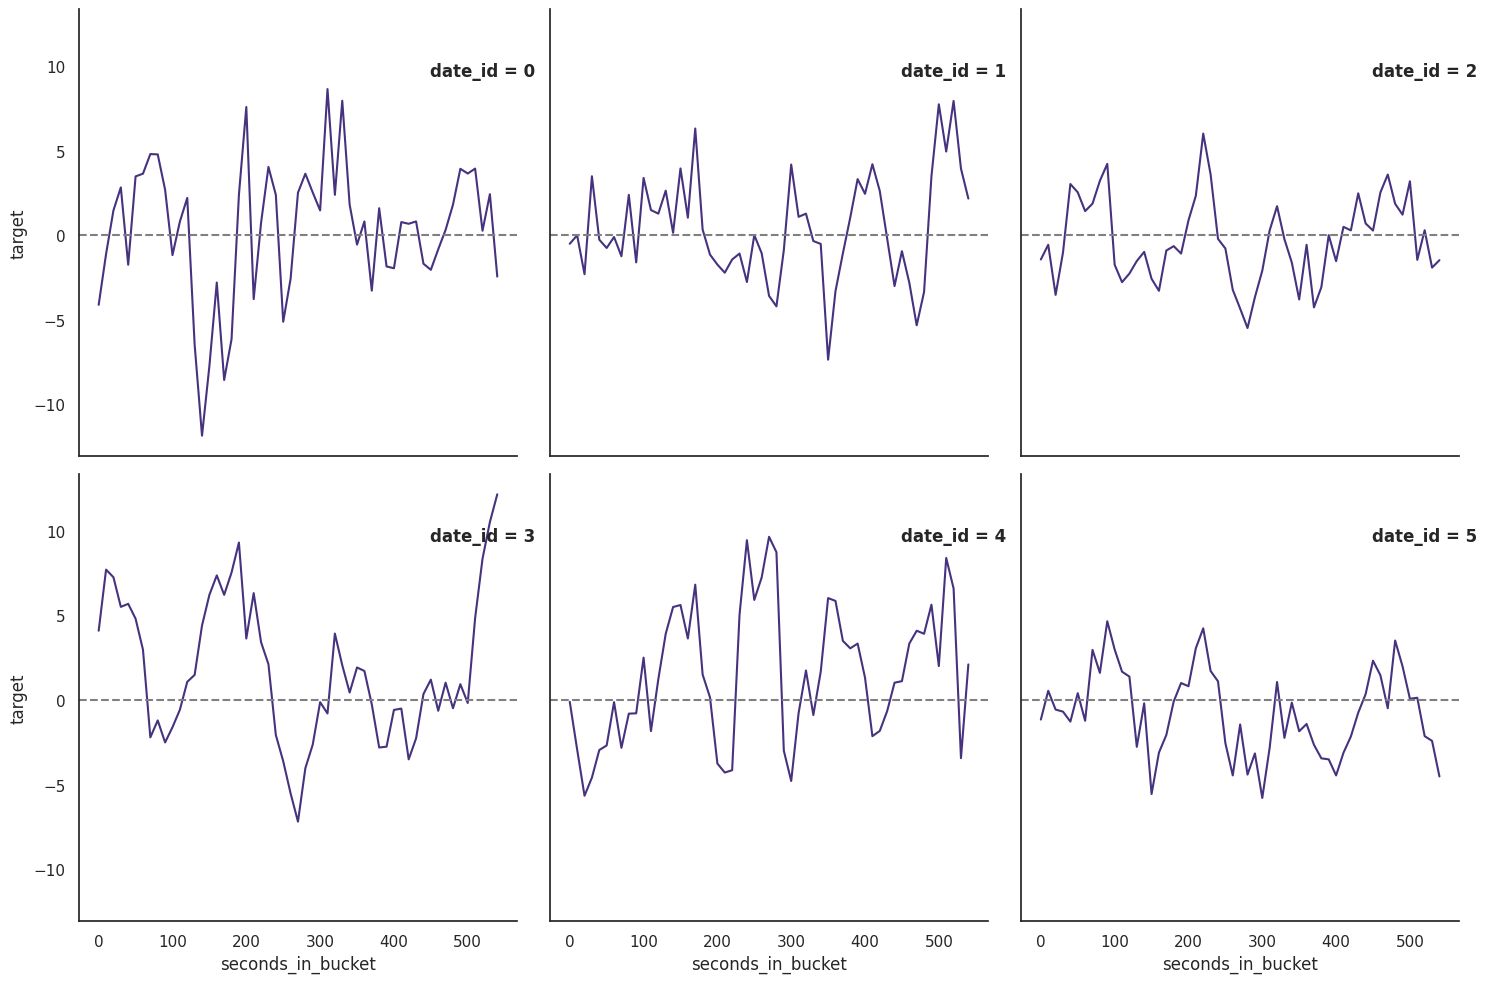

In [109]:
g = sns.relplot(
    data=train.query(" date_id < 6"),
    x="seconds_in_bucket",
    y="target",
    kind="line",
    col="date_id",
    col_wrap=3
)
g.refline(y=0)
for date_id, ax in g.axes_dict.items():
    ax.text(.8, .85, f"date_id = {date_id}", transform=ax.transAxes, fontweight="bold")
g.set_titles("")
g.tight_layout()
plt.show()

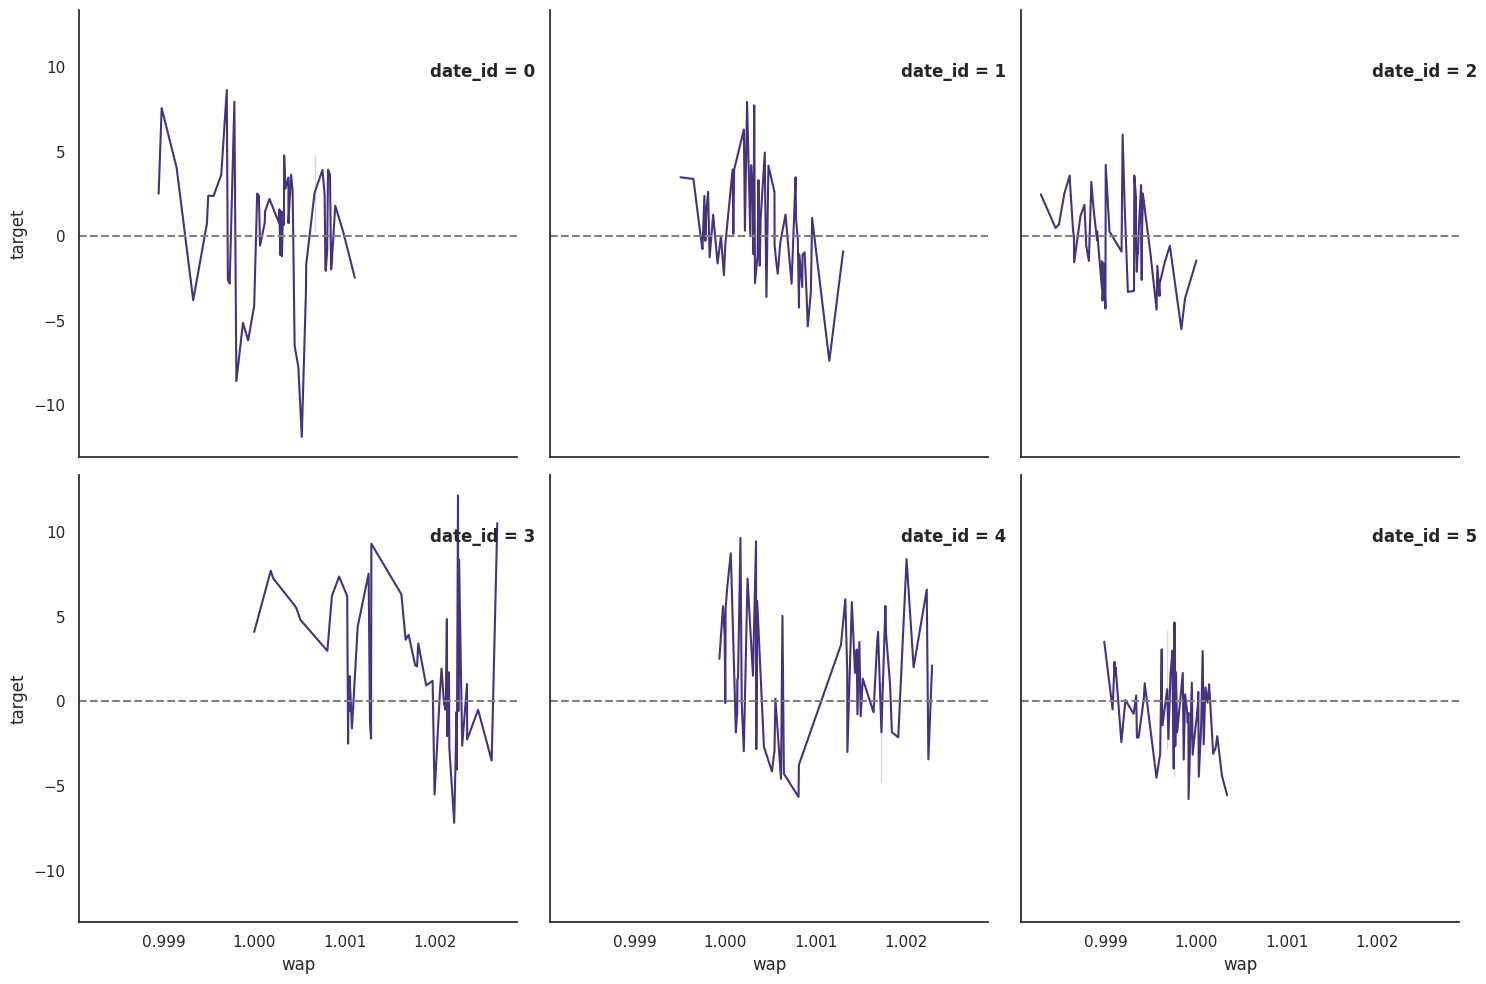

In [110]:
g = sns.relplot(
    data=train.query(" date_id < 6"),
    x="wap",
    y="target",
    kind="line",
    col="date_id",
    col_wrap=3
)
g.refline(y=0)
for date_id, ax in g.axes_dict.items():
    ax.text(.8, .85, f"date_id = {date_id}", transform=ax.transAxes, fontweight="bold")
g.set_titles("")
g.tight_layout()
plt.show()

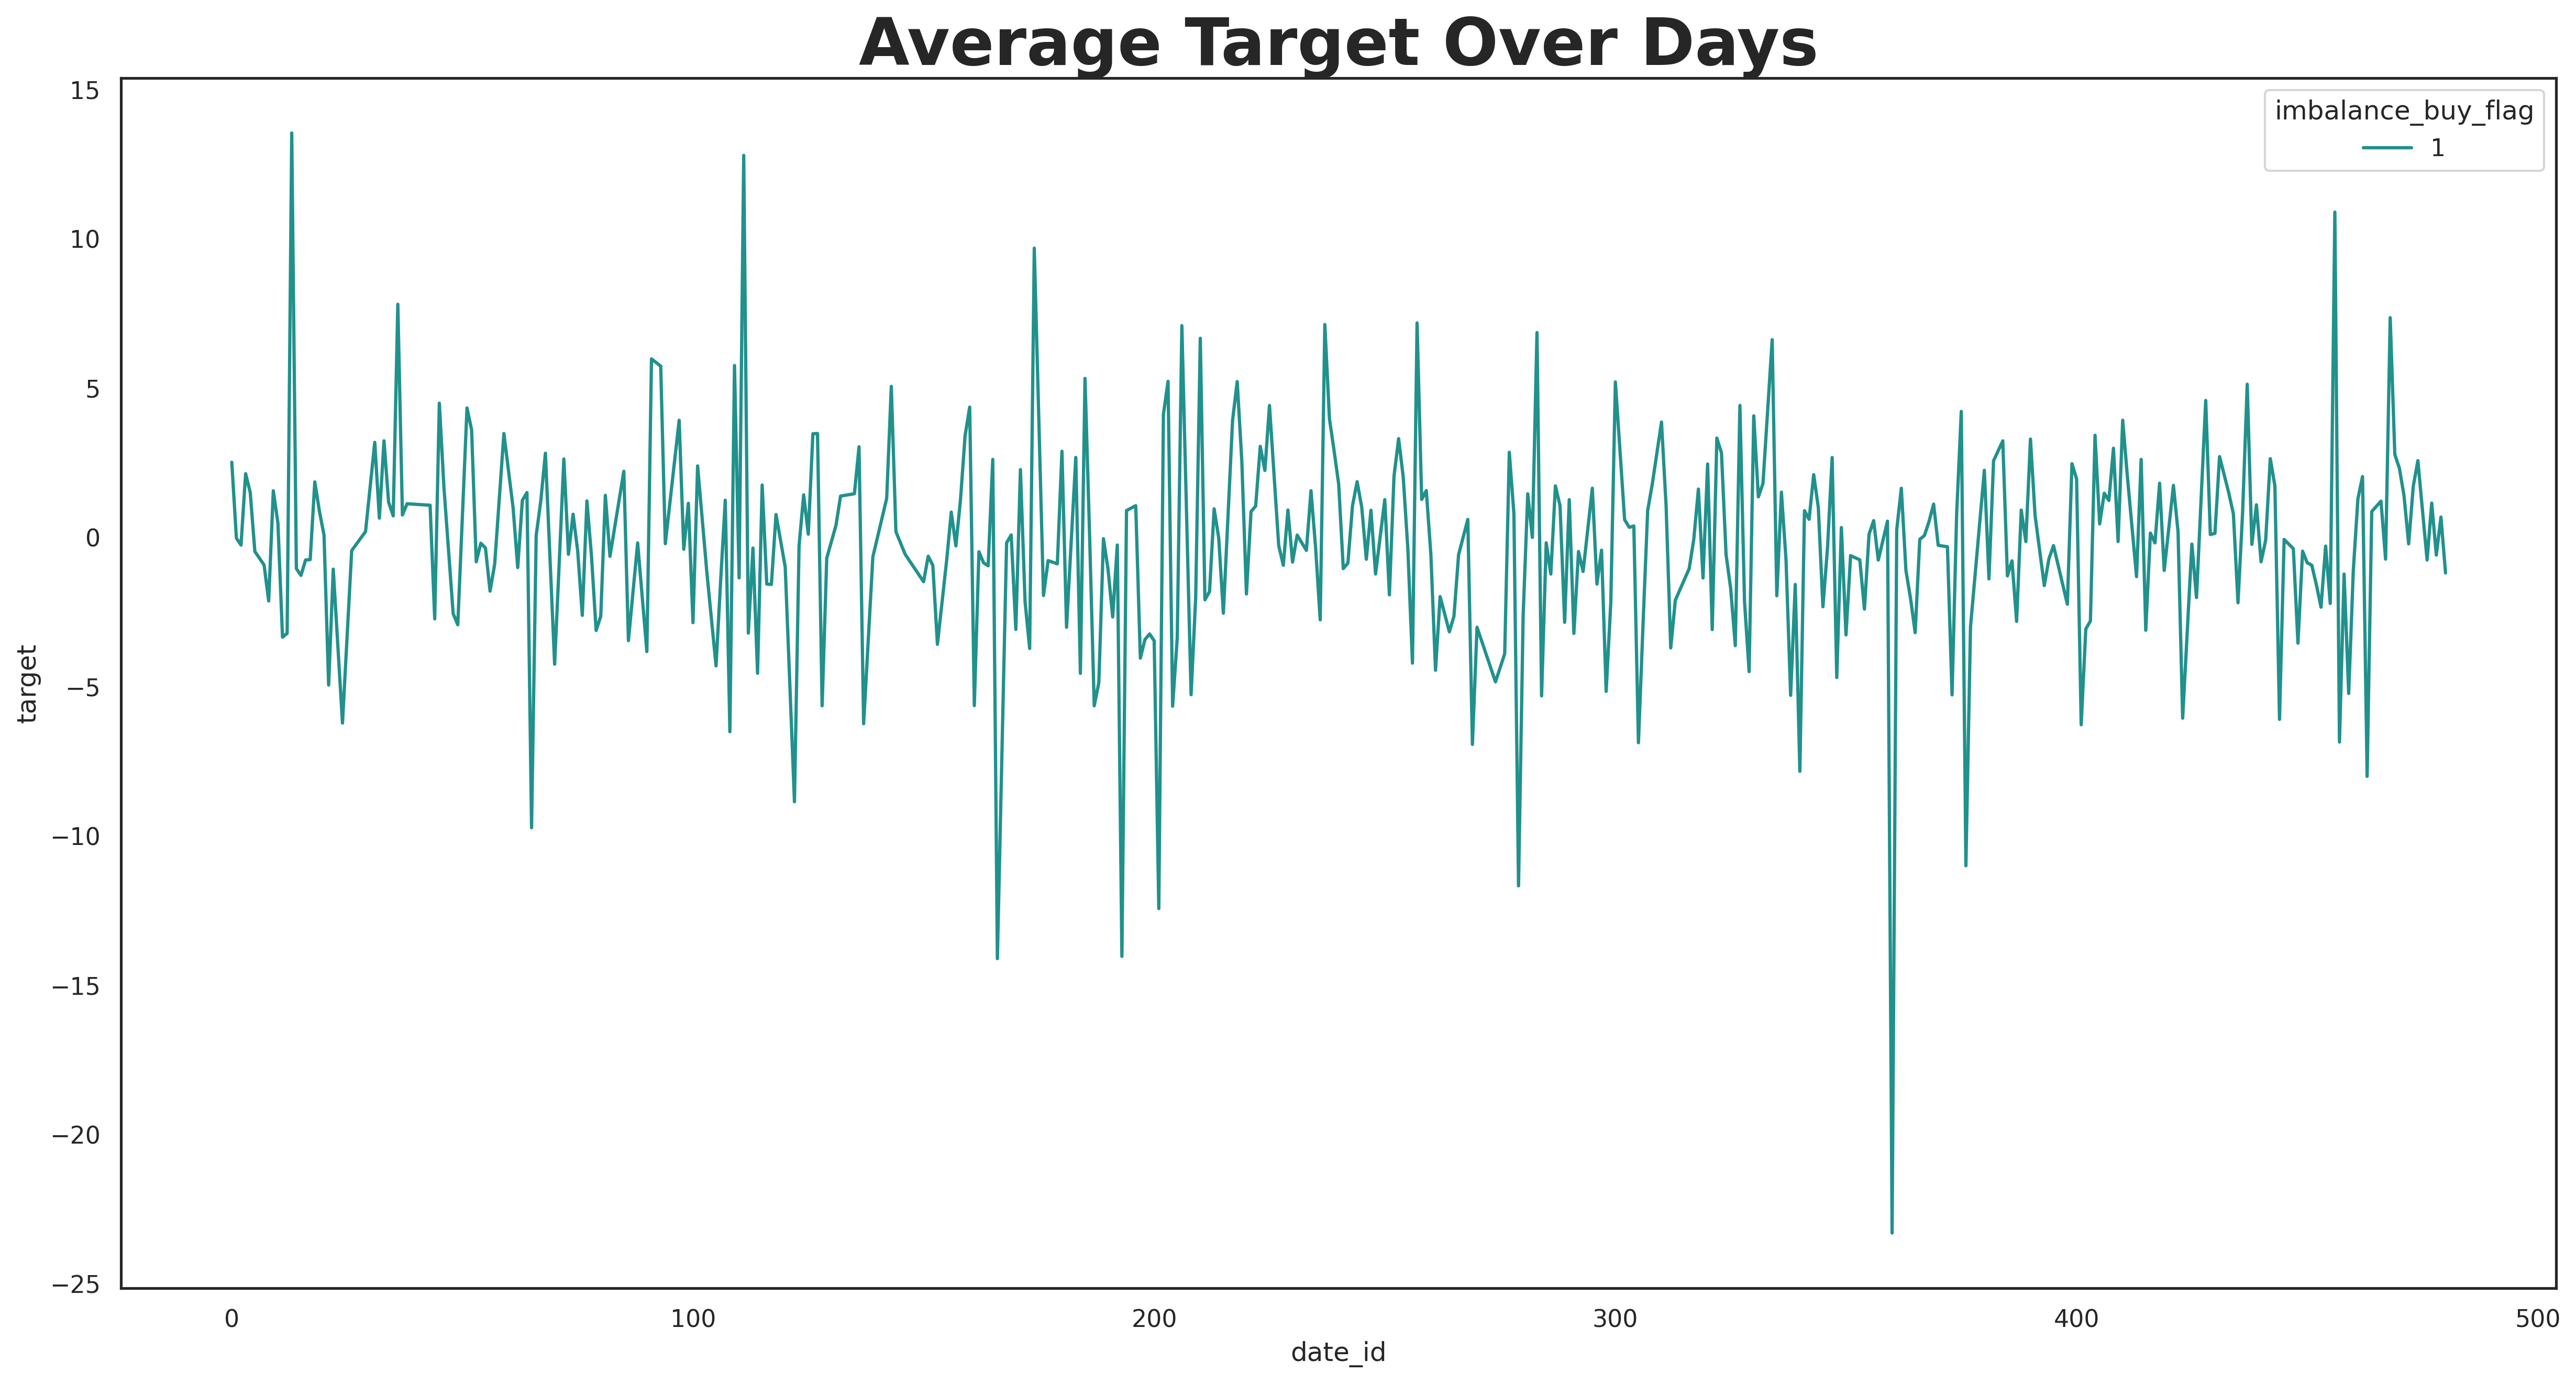

In [102]:
plt.figure(figsize = (20, 10), dpi = 300)

sns.lineplot(data = train[train['imbalance_buy_flag']==1], x = 'date_id', y = 'target', hue = 'imbalance_buy_flag', errorbar = None, palette = 'viridis')

plt.title('Average Target Over Days', weight = 'bold', fontsize = 30)
plt.show()

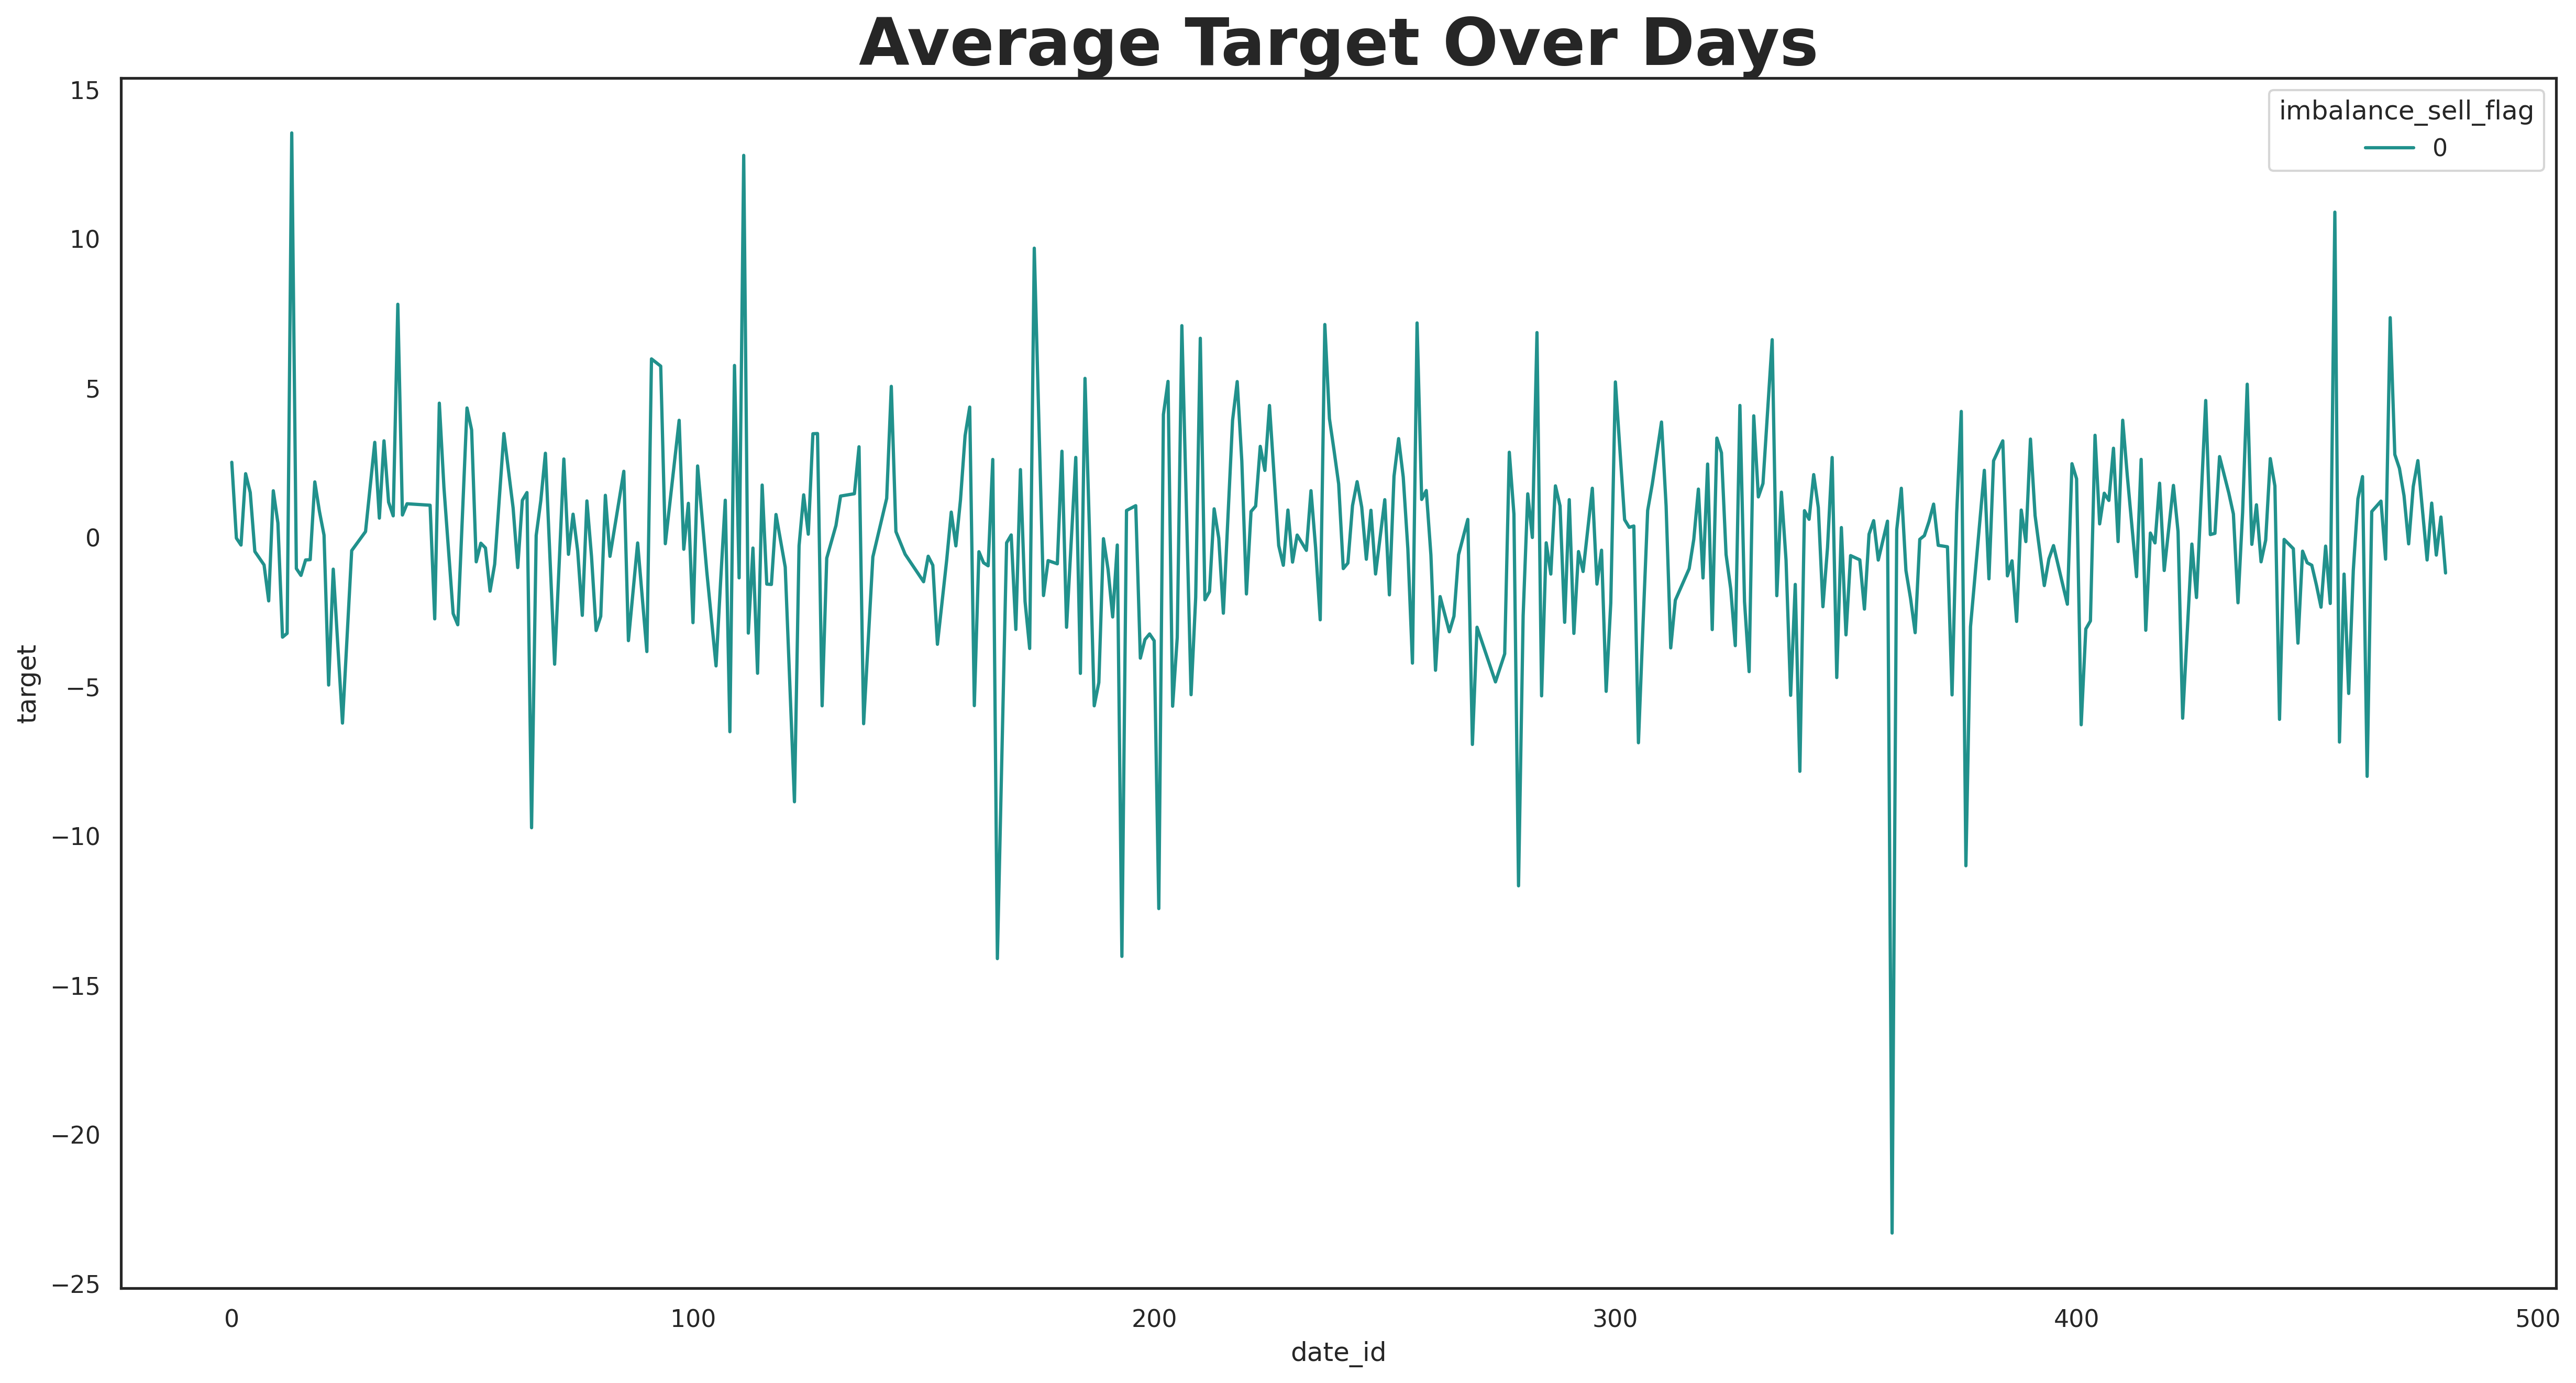

In [108]:
plt.figure(figsize = (20, 10), dpi = 300)

sns.lineplot(data = train[train['imbalance_buy_sell_flag']==1], x = 'date_id', y = 'target', hue = 'imbalance_sell_flag', errorbar = None, palette = 'viridis')

plt.title('Average Target Over Days', weight = 'bold', fontsize = 30)
plt.show()

In [101]:
train[train['imbalance_buy_flag']==0]

stock_id  date_id  seconds_in_bucket  imbalance_size  \
0           142        0                  0     27645525.02   
1           142        0                 10     25632933.90   
2           142        0                 20     25481844.28   
3           142        0                 30     25486202.64   
4           142        0                 40     25925427.89   
...         ...      ...                ...             ...   
26446       142      480                460     12148853.14   
26447       142      480                470      6575802.32   
26448       142      480                480      5785703.29   
26449       142      480                490      5252343.23   
26450       142      480                500      5161576.93   

       imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                           -1         1.000100  4.212543e+07   1.000247   
1                           -1         1.000265  4.414722e+07   1.000247   
2                           -1         1.000224  4.429831e+07   1.000247   
3                           -1         1.000265  4.429395e+07   1.000247   
4                           -1         1.000616  4.418015e+07   1.000247   
...                        ...              ...           ...        ...   
26446                       -1         0.998322  1.920407e+08   0.997014   
26447                       -1         0.998160  1.974314e+08   0.997442   
26448                       -1         0.998090  1.981610e+08   0.997616   
26449                       -1         0.998067  1.986943e+08   0.997616   
26450                       -1         0.998009  1.986943e+08   0.997616   

       near_price  bid_price   bid_size  ask_price   ask_size       wap  \
0        1.000050   0.999687   17427.96   1.000513   28586.09  1.000000   
1        1.000050   1.000038   15981.24   1.000327    2422.10  1.000289   
2        1.000050   1.000203    4359.24   1.000410    4844.60  1.000301   
3        1.000050   1.000245    1937.52   1.000575    4360.86  1.000346   
4        1.000050   1.000513  128879.66   1.000885   11147.87  1.000855   
...           ...        ...        ...        ...        ...       ...   
26446    0.997014   0.998079    3451.12   0.998402  345224.00  0.998082   
26447    0.997616   0.998090   61258.09   0.998333     863.00  0.998330   
26448    0.997616   0.998067    6902.16   0.998298    6040.79  0.998190   
26449    0.997616   0.998044    6902.00   0.998241    1725.84  0.998201   
26450    0.997616   0.997998  157013.22   0.998275    3451.80  0.998269   

          target  time_id  imbalance_buy_flag  imbalance_sell_flag  \
0      -4.119873        0                   0                    1   
1      -1.119971        1                   0                    1   
2       1.460314        2                   0                    1   
3       2.820492        3                   0                    1   
4      -1.749992        4                   0                    1   
...          ...      ...                 ...                  ...   
26446  -8.170009    26446                   0                    1   
26447 -11.500120    26447                   0                    1   
26448  -9.880066    26448                   0                    1   
26449 -11.249781    26449                   0                    1   
26450 -10.120273    26450                   0                    1   

       no_imbalance  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
26446             0  
26447             0  
26448             0  
26449             0  
26450             0  

[14784 rows x 19 columns]

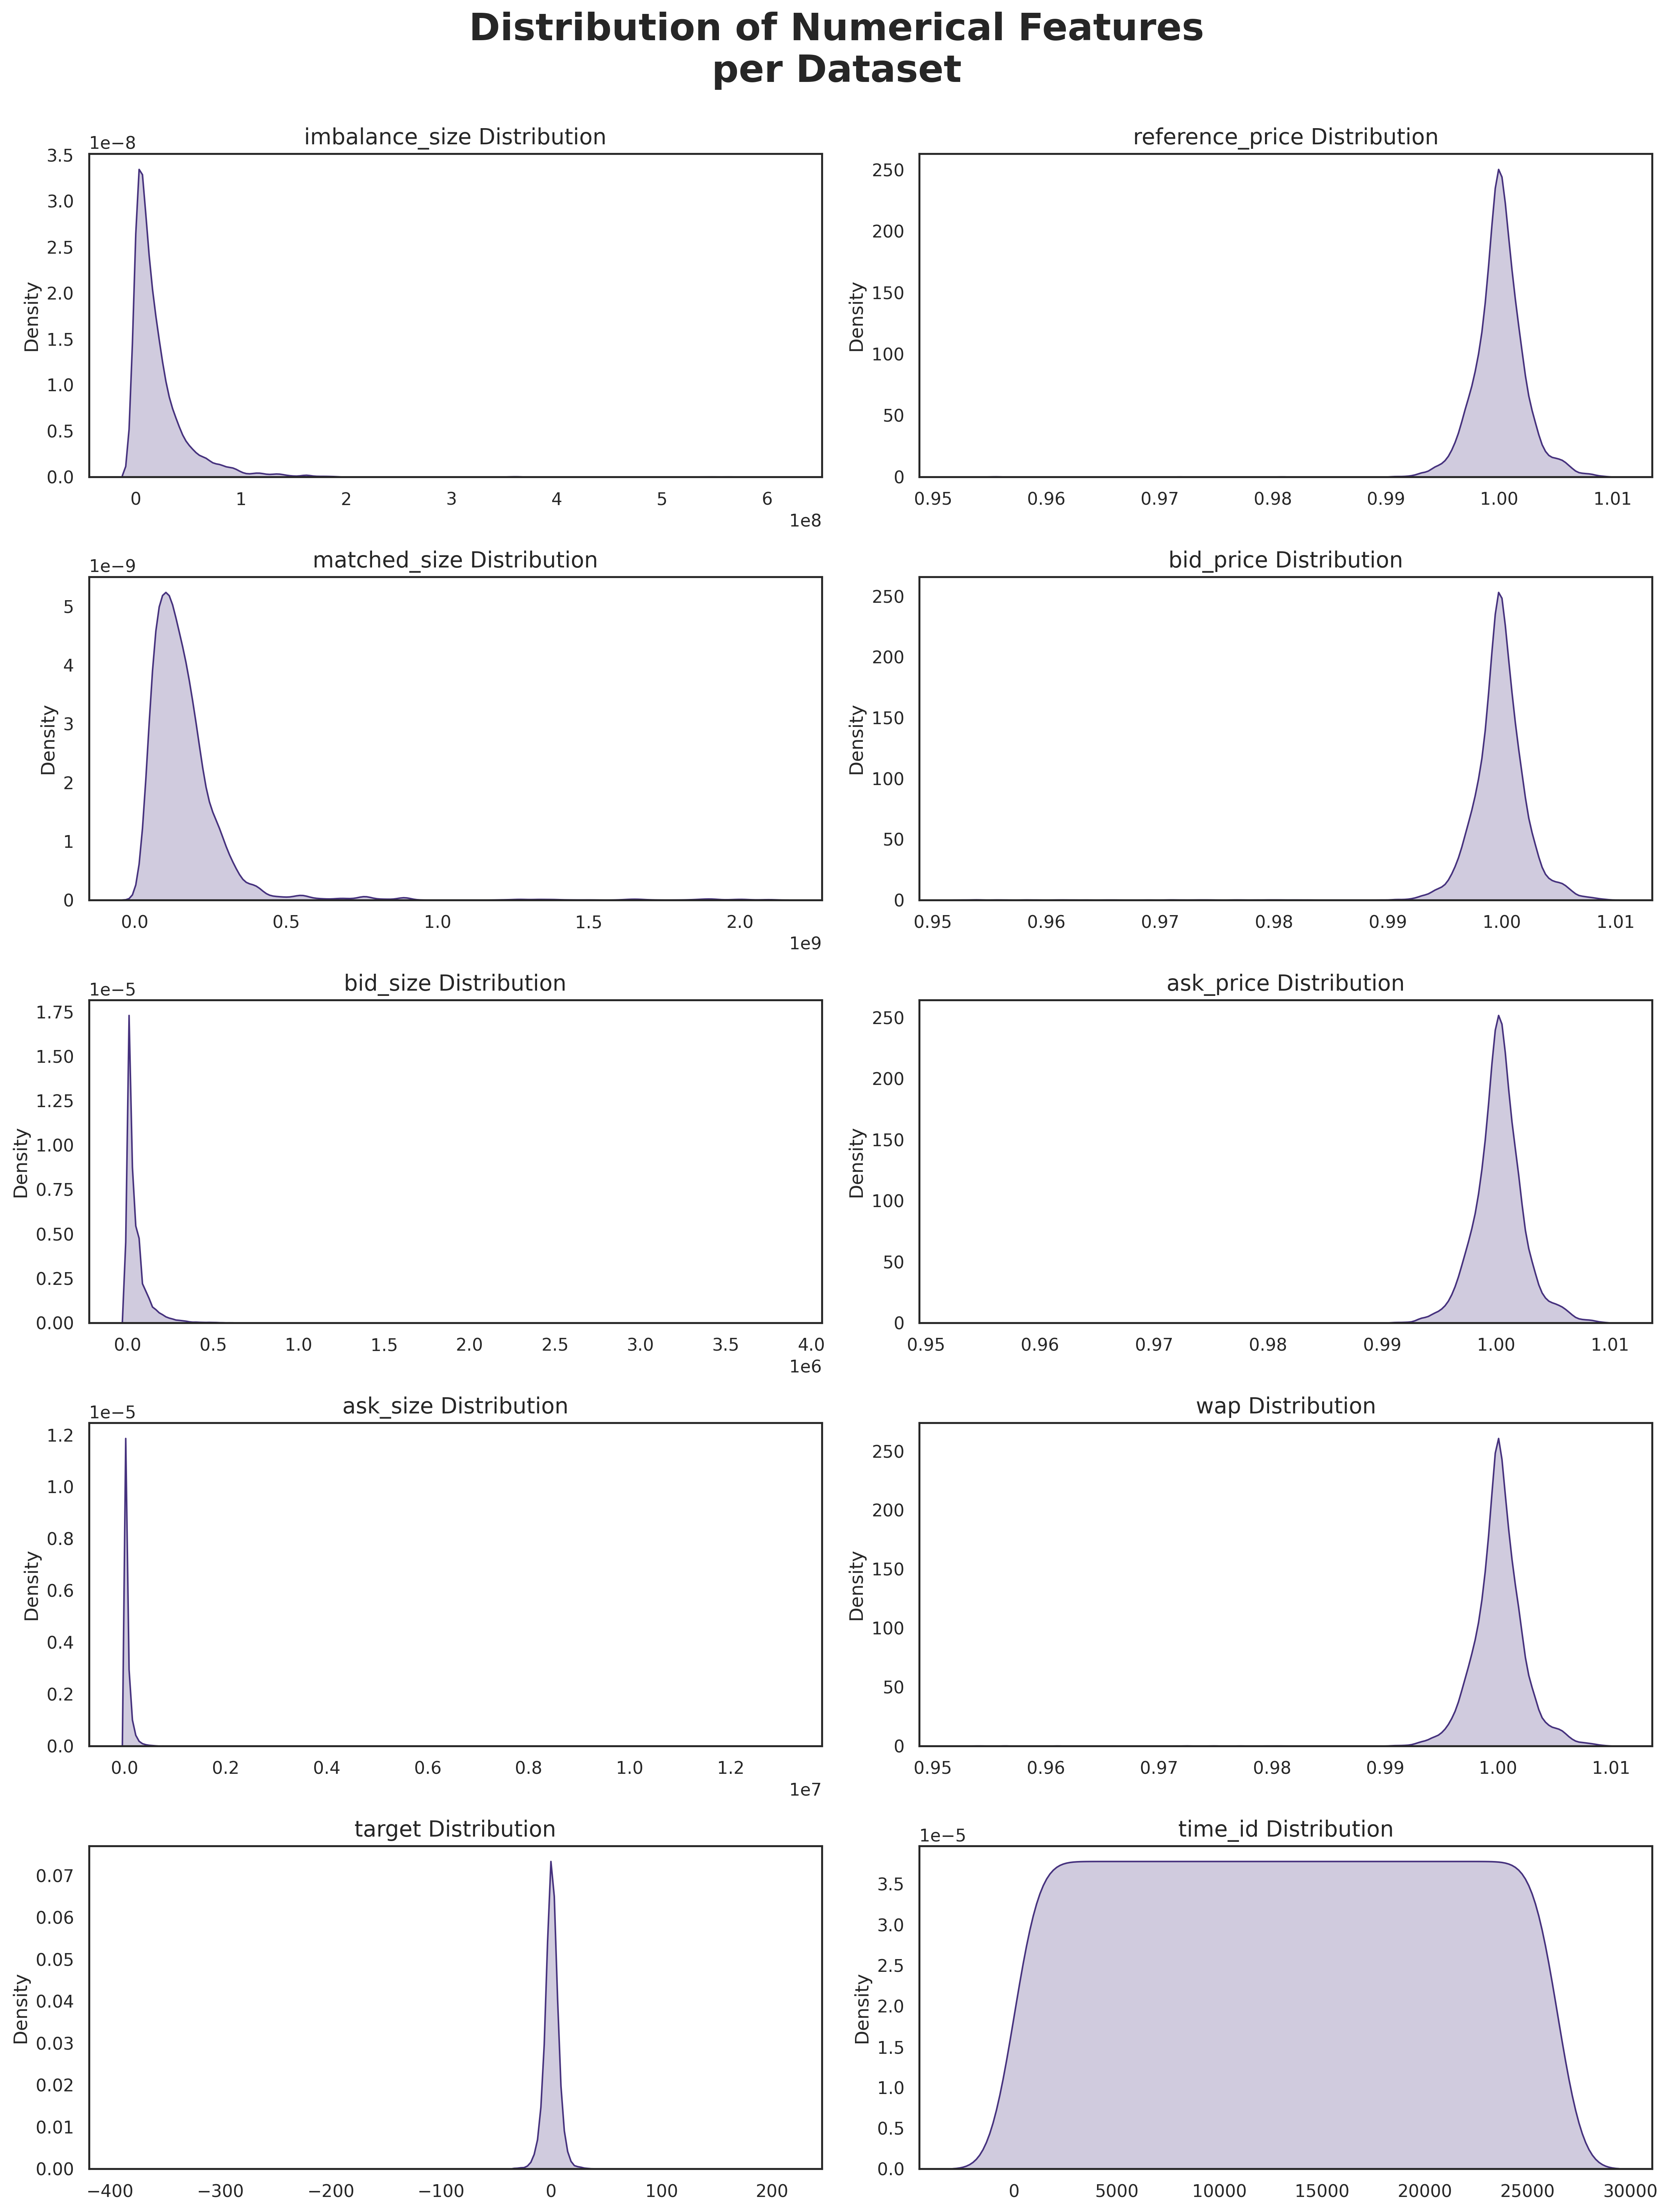

In [41]:
fig, ax = plt.subplots(5, 2, figsize = (15, 20), dpi = 300)
ax = ax.flatten()

for i, column in enumerate(numerical_features):

    sns.kdeplot(train[column], ax=ax[i], color=pal[0], fill = True)

    ax[i].set_title(f'{column} Distribution', size = 14)
    ax[i].set_xlabel(None)

fig.suptitle('Distribution of Numerical Features\nper Dataset\n', fontsize = 24, fontweight = 'bold')
plt.tight_layout()

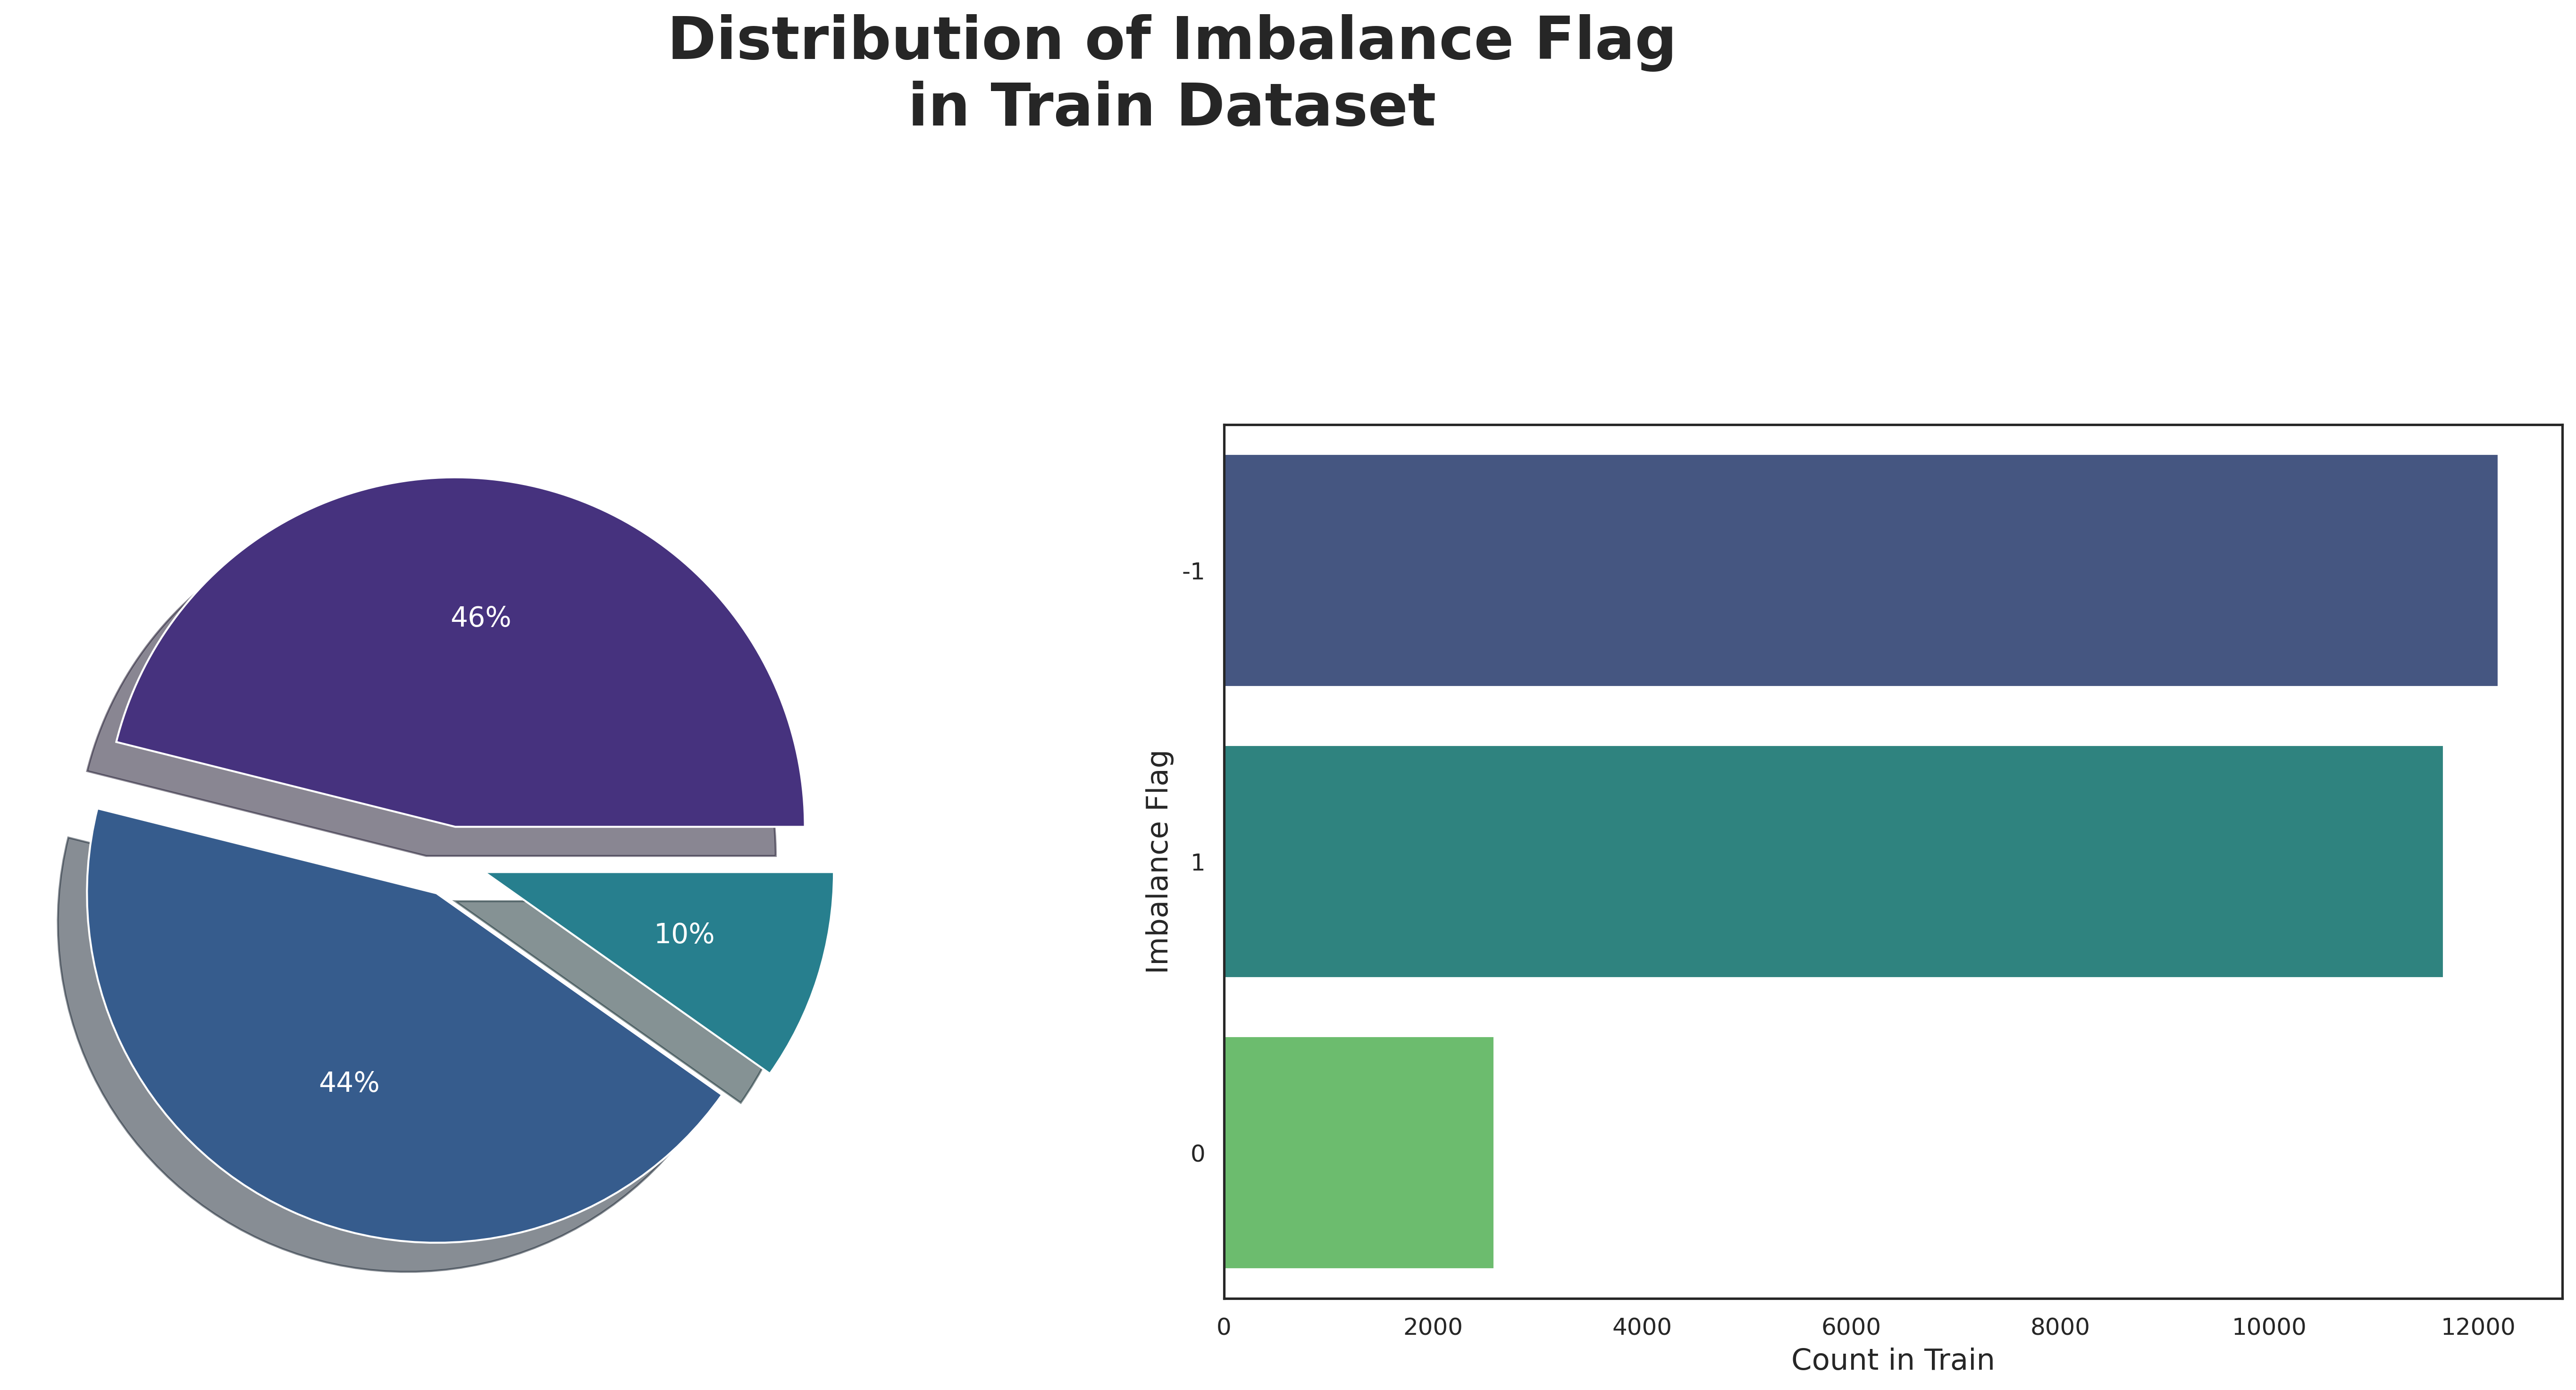

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10), dpi = 300)
ax = ax.flatten()

ax[0].pie(
    train['imbalance_buy_sell_flag'].value_counts(),
    shadow = True,
    explode = [.1 for i in range(train['imbalance_buy_sell_flag'].nunique())],
    autopct = '%1.f%%',
    textprops = {'size' : 14, 'color' : 'white'}
)

sns.countplot(data = train, y = 'imbalance_buy_sell_flag', ax = ax[1], palette = 'viridis', order = train['imbalance_buy_sell_flag'].value_counts().index)
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize = 12)
ax[1].set_xlabel('Count in Train', fontsize = 15)
ax[1].set_ylabel('Imbalance Flag', fontsize = 15)
plt.xticks(fontsize = 12)

fig.suptitle('Distribution of Imbalance Flag\nin Train Dataset\n\n\n\n', fontsize = 30, fontweight = 'bold')
plt.tight_layout()

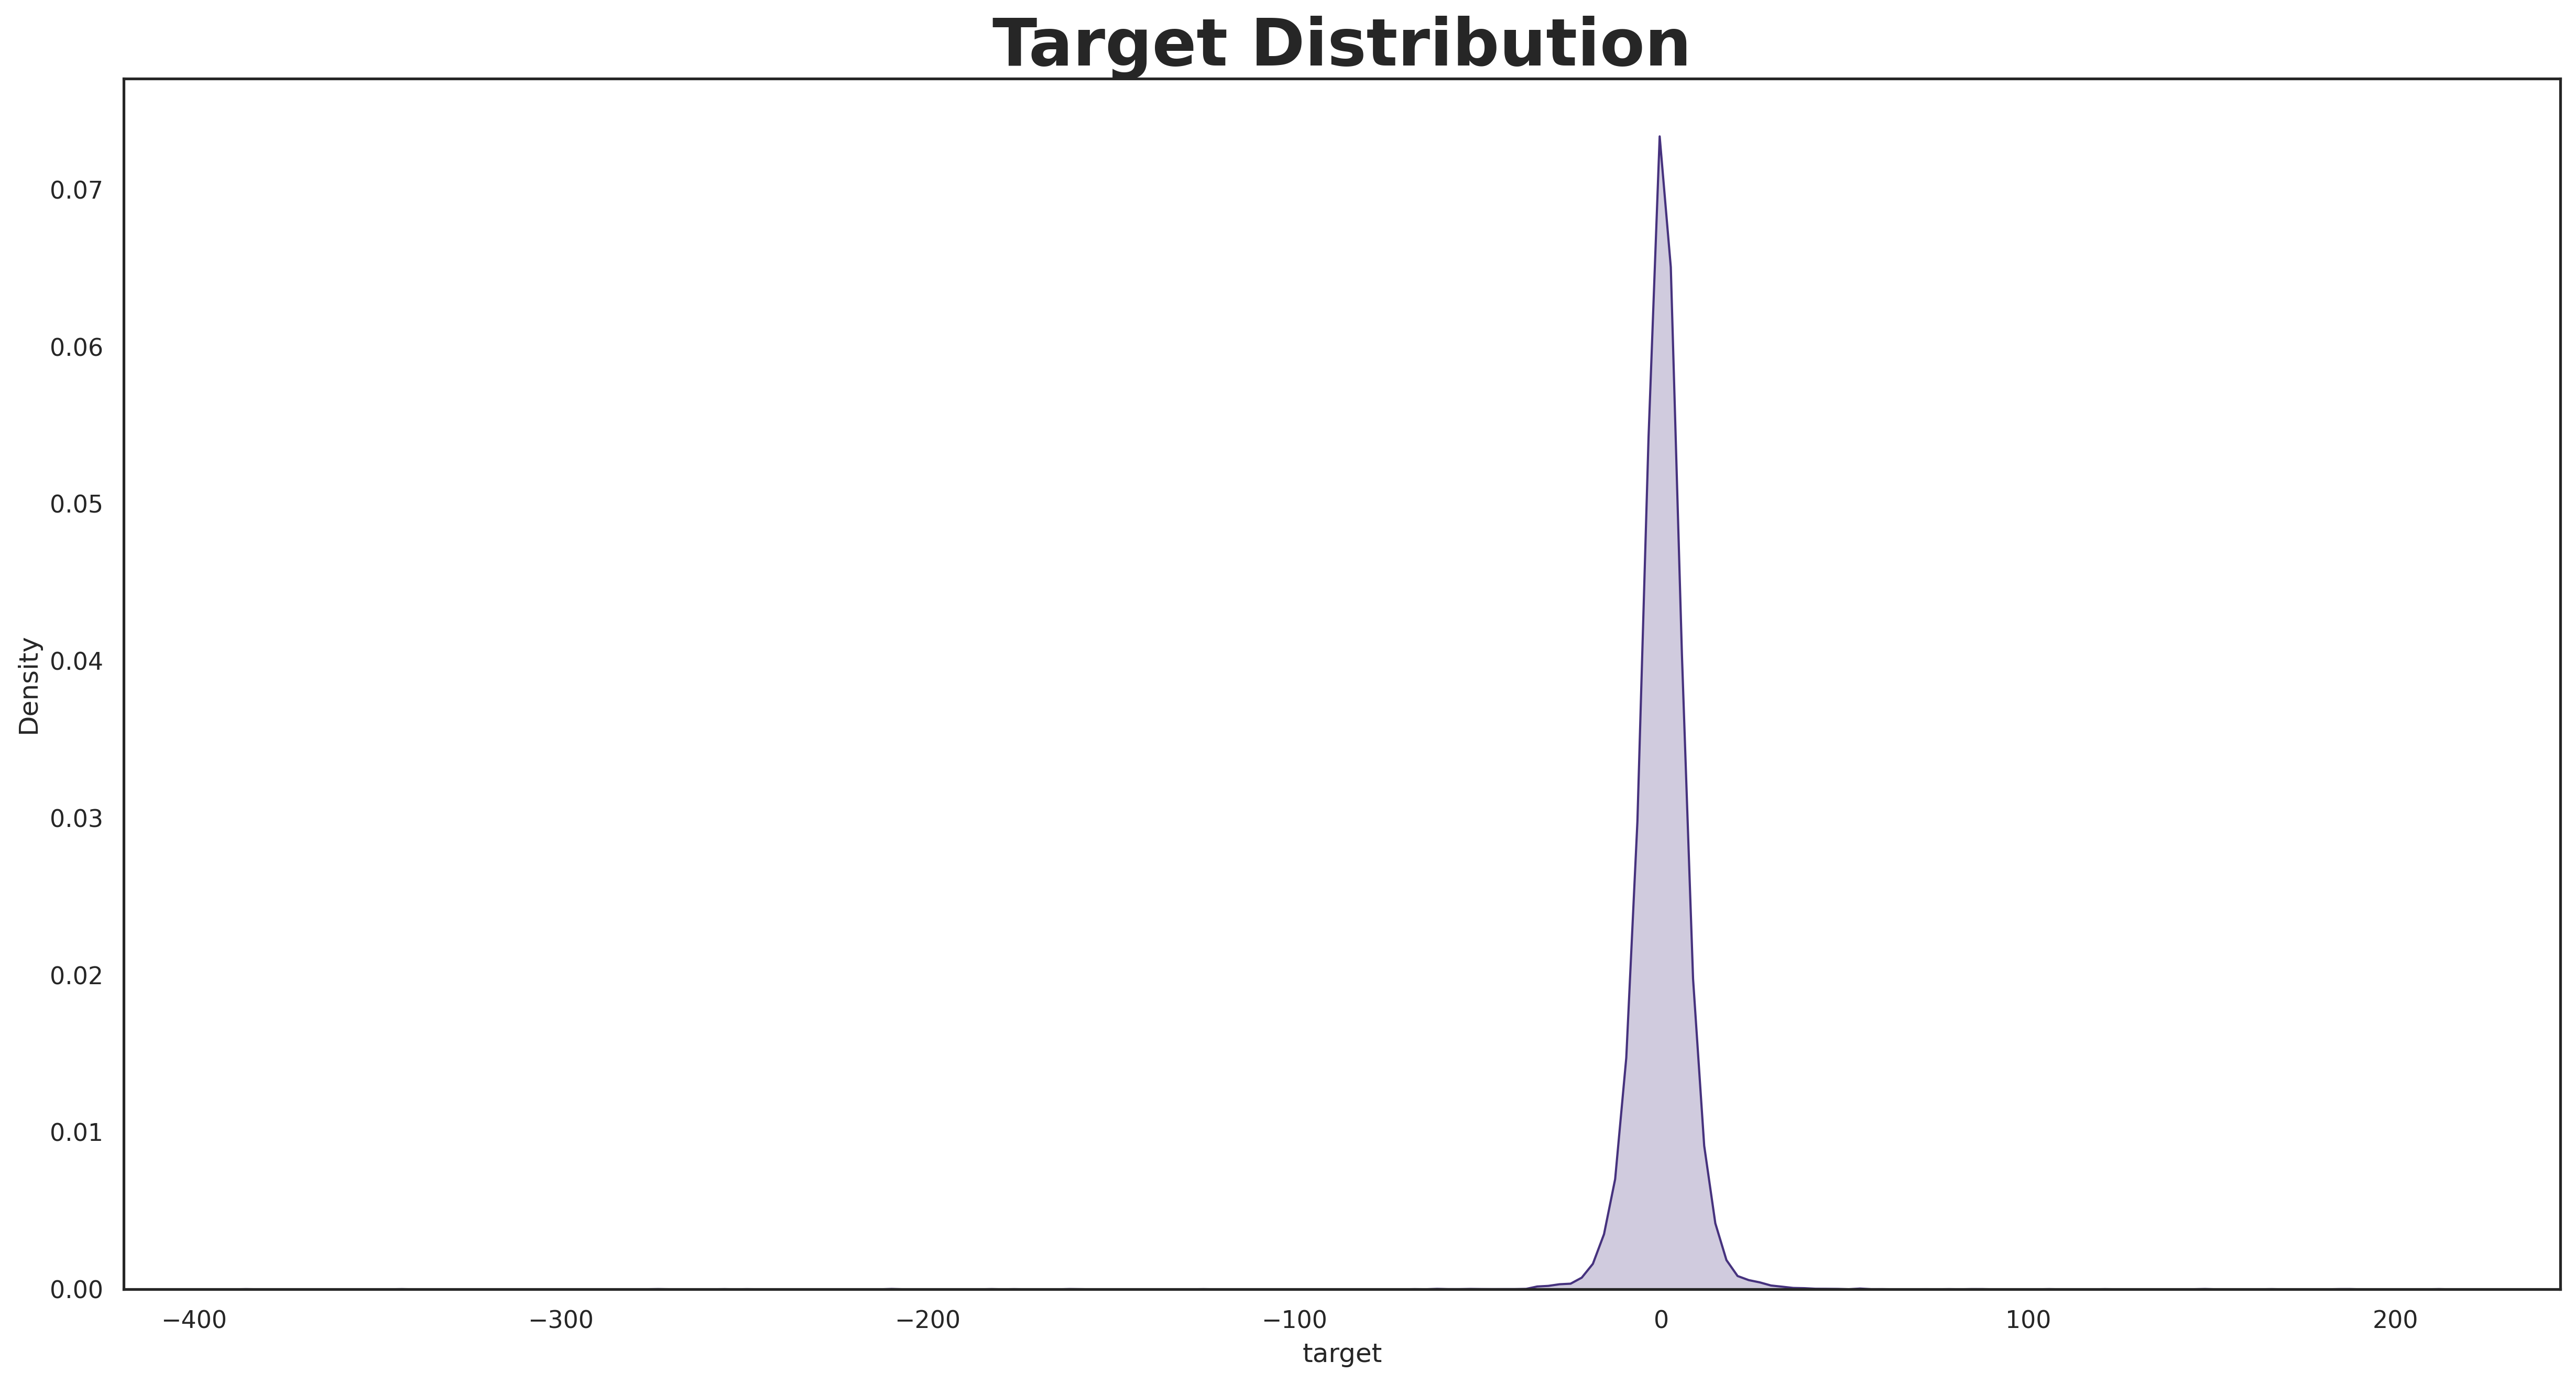

In [43]:
plt.figure(figsize = (20, 10), dpi = 300)

sns.kdeplot(train.target, fill = True)

plt.title('Target Distribution', weight = 'bold', fontsize = 30)
plt.show()

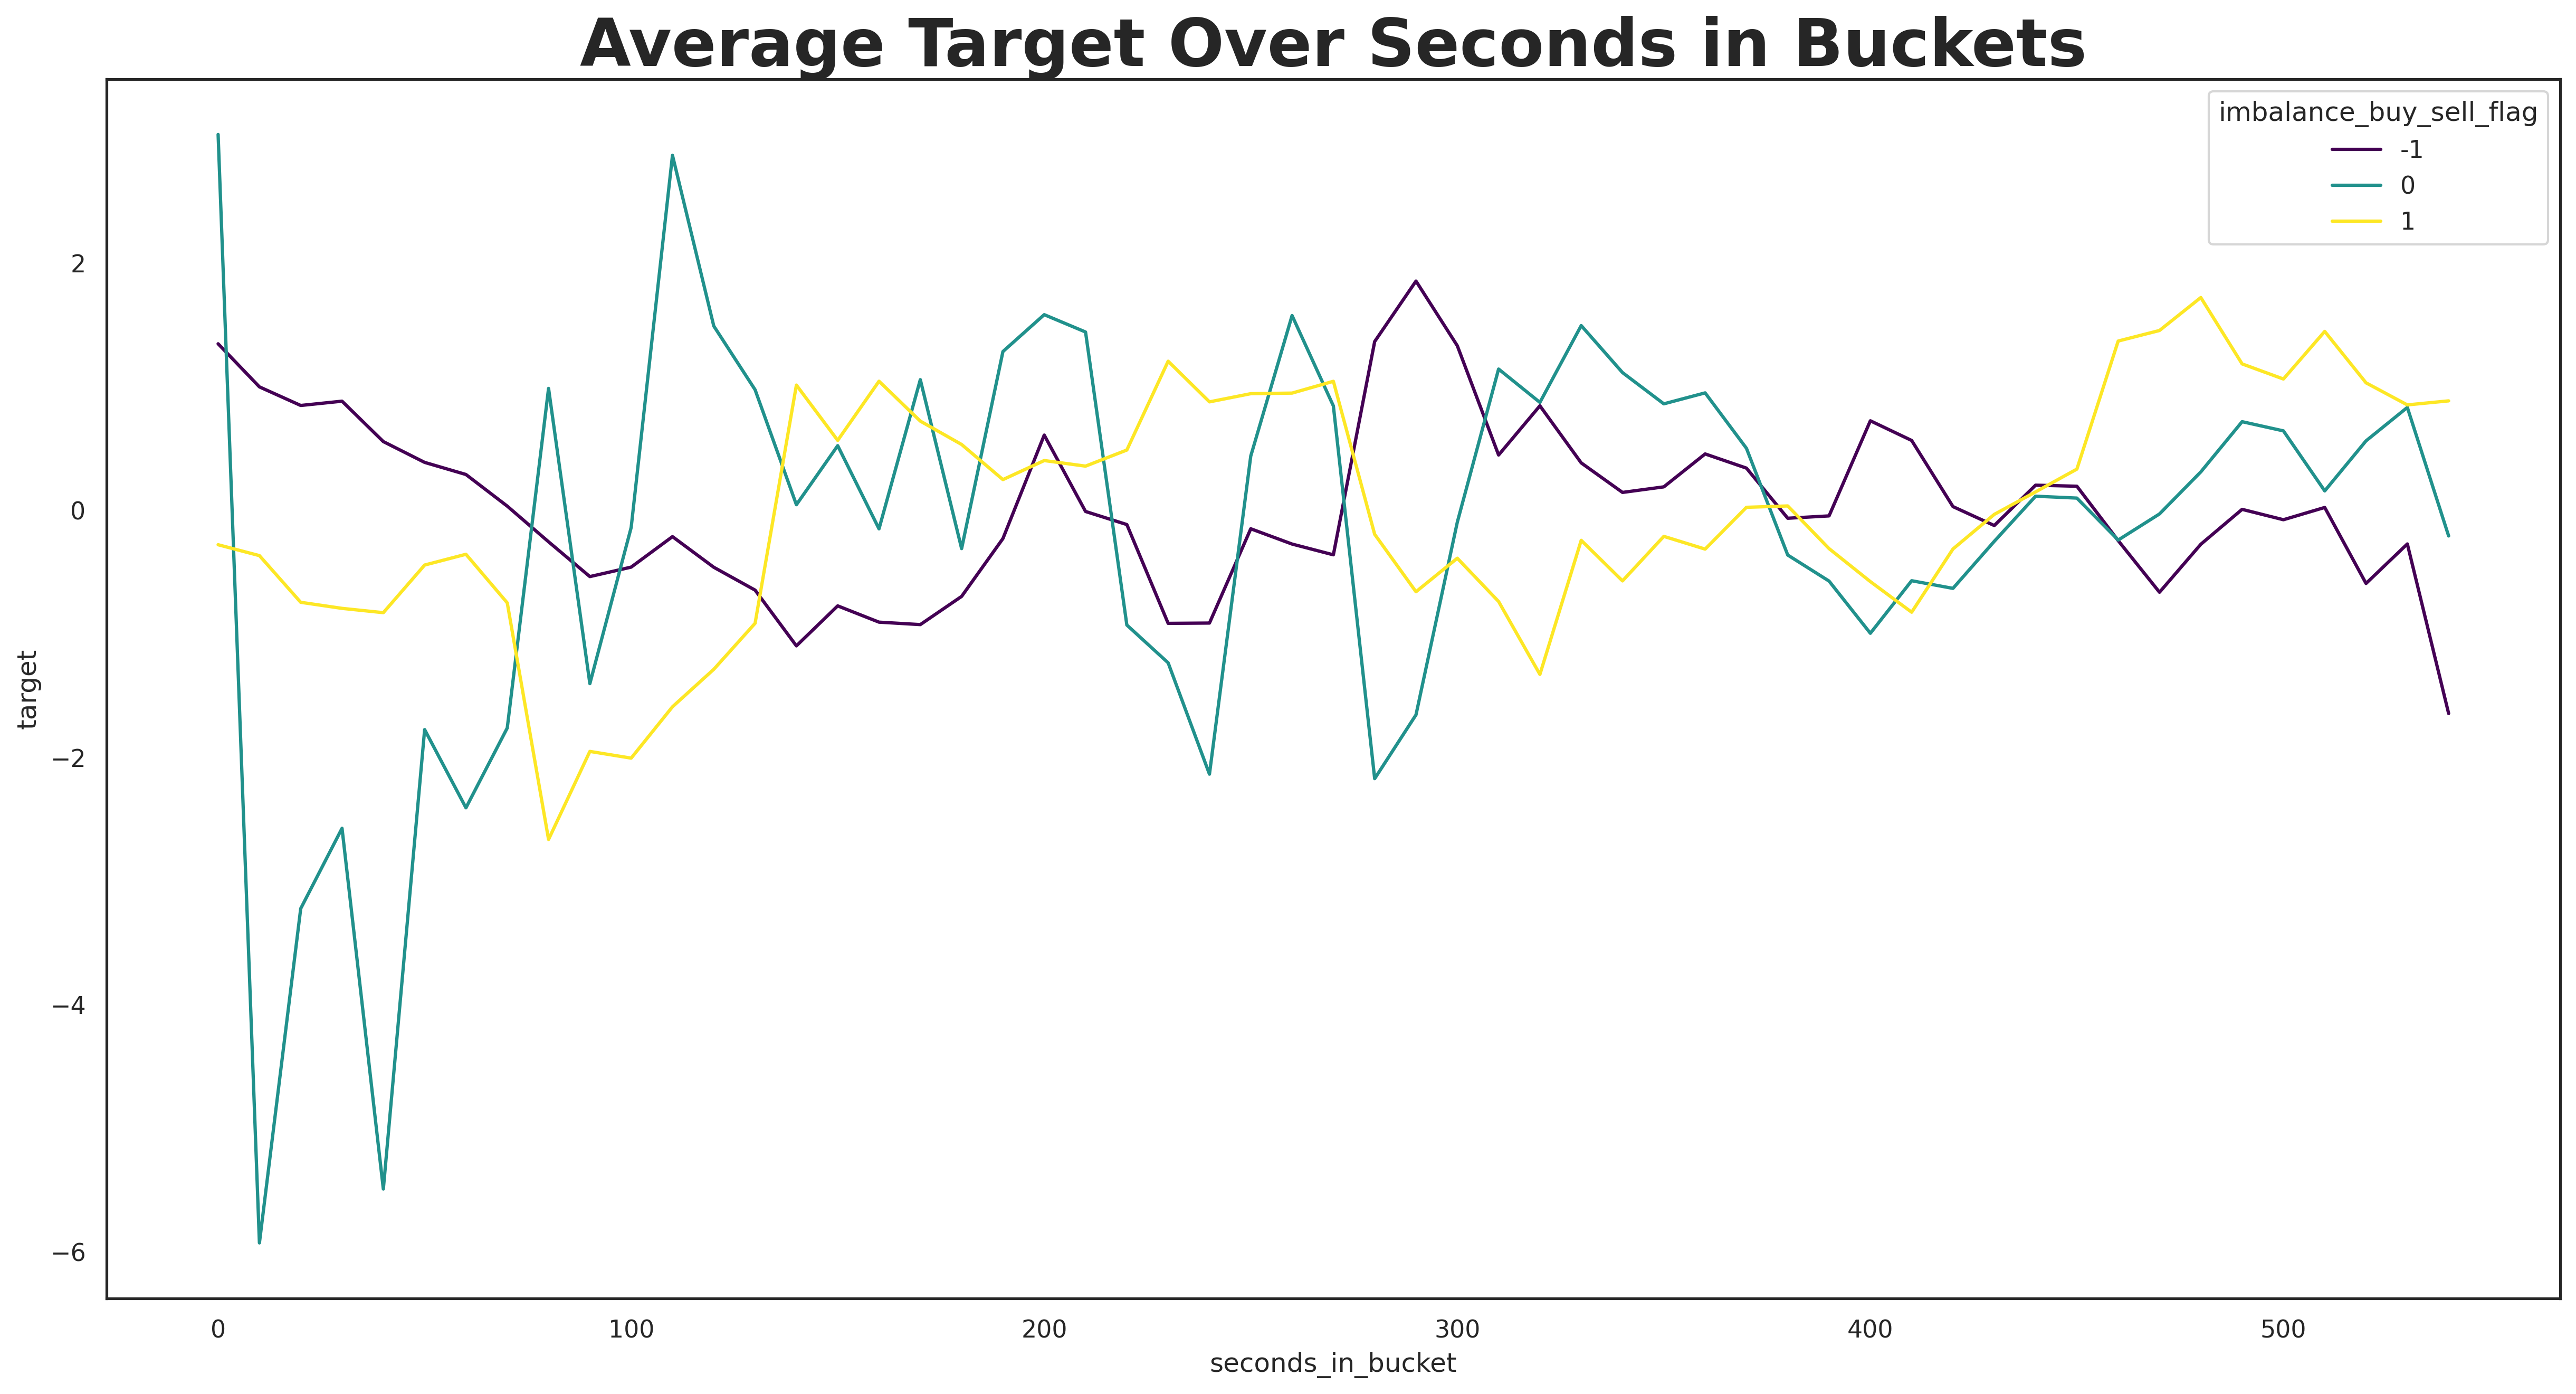

In [45]:
plt.figure(figsize = (20, 10), dpi = 300)

sns.lineplot(data = train, x = 'seconds_in_bucket', y = 'target', hue = 'imbalance_buy_sell_flag', errorbar = None, palette = 'viridis')

plt.title('Average Target Over Seconds in Buckets', weight = 'bold', fontsize = 30)
plt.show()

In [52]:
train

stock_id  date_id  seconds_in_bucket  imbalance_size  \
0           142        0                  0     27645525.02   
1           142        0                 10     25632933.90   
2           142        0                 20     25481844.28   
3           142        0                 30     25486202.64   
4           142        0                 40     25925427.89   
...         ...      ...                ...             ...   
26450       142      480                500      5161576.93   
26451       142      480                510        81257.45   
26452       142      480                520       902476.35   
26453       142      480                530      1868921.34   
26454       142      480                540      3315131.05   

       imbalance_buy_sell_flag  reference_price  matched_size  bid_price  \
0                           -1         1.000100  4.212543e+07   0.999687   
1                           -1         1.000265  4.414722e+07   1.000038   
2                           -1         1.000224  4.429831e+07   1.000203   
3                           -1         1.000265  4.429395e+07   1.000245   
4                           -1         1.000616  4.418015e+07   1.000513   
...                        ...              ...           ...        ...   
26450                       -1         0.998009  1.986943e+08   0.997998   
26451                        1         0.997431  2.033450e+08   0.997373   
26452                        1         0.997269  2.032188e+08   0.997014   
26453                        1         0.997223  2.032188e+08   0.997072   
26454                        1         0.997095  2.031004e+08   0.997084   

        bid_size  ask_price     ask_size       wap     target  time_id  
0       17427.96   1.000513     28586.09  1.000000  -4.119873        0  
1       15981.24   1.000327      2422.10  1.000289  -1.119971        1  
2        4359.24   1.000410      4844.60  1.000301   1.460314        2  
3        1937.52   1.000575      4360.86  1.000346   2.820492        3  
4      128879.66   1.000885     11147.87  1.000855  -1.749992        4  
...          ...        ...          ...       ...        ...      ...  
26450  157013.22   0.998275      3451.80  0.998269 -10.120273    26450  
26451   37073.31   0.997639  13092094.40  0.997374  -3.889799    26451  
26452  180990.60   0.997304    115522.74  0.997191  -2.530217    26452  
26453  195653.57   0.997304    293979.51  0.997165   1.200438    26453  
26454   14652.64   0.997257    273276.19  0.997093   0.469685    26454  

[26455 rows x 14 columns]

In [53]:
print(len(train.loc[train['date_id']==0]))

55


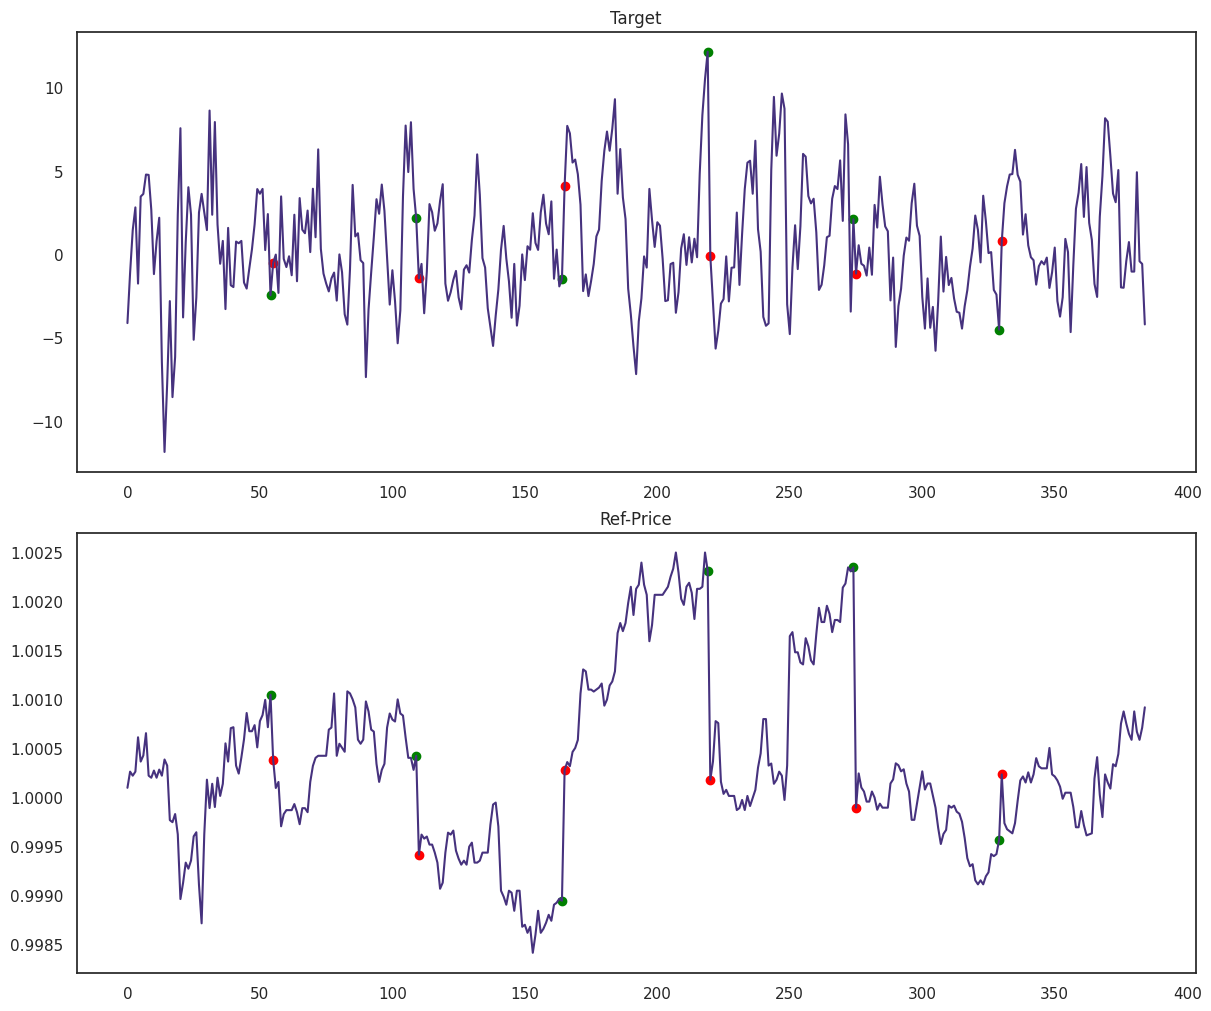

In [54]:
import matplotlib.pyplot as plt
x1 = train.loc[train['date_id']<=6,'time_id']
y1 = train.loc[train['date_id']<=6,'target']
x2 = train.loc[train['date_id']<=6,'time_id']
y2 = train.loc[train['date_id']<=6,'reference_price']
fig,axs = plt.subplots(nrows=2, ncols=1, figsize=(12,10),constrained_layout=True)
axs[0].plot(x1,y1)
axs[0].set_title('Target')
axs[1].plot(x2,y2)
axs[1].set_title('Ref-Price')
for i in range(1,7):
    if(i*54<=len(x1)):
        axs[0].scatter(x=54*i+(i-1),y=y1[54*i+(i-1)],color='green') # end of today
        axs[0].scatter(x=54*i+i,y=y1[54*i+i],color='red') # start of tomorrow
        axs[1].scatter(x=54*i+(i-1),y=y2[54*i+(i-1)],color='green')
        axs[1].scatter(x=54*i+i,y=y2[54*i+i],color='red')
plt.show()